In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [2]:
import gplearn
from sklearn.utils.random import check_random_state

# Simple 1d functions

In [3]:
f = np.cos
x0 = 0
x1 = 2 * np.pi

n_input_dim = 1

In [4]:
x = np.linspace(x0, x1, 100)
y = f(x)

Text(0.5, 0, 'y / a.u.')

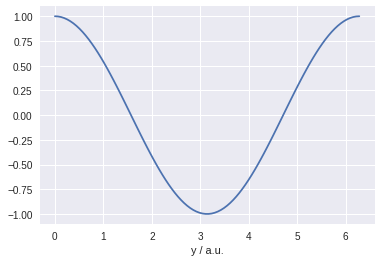

In [5]:
plt.plot(x, y, label="reference")
plt.xlabel("x / a.u.")
plt.xlabel("y / a.u.")

### Training

In [6]:
x_m = (x0 + x1) / 2

rng = check_random_state(0)

# Training samples
n_train = 20
X_train = rng.uniform(x0, x_m, n_train * n_input_dim).reshape(n_train, n_input_dim)
y_train = f(X_train)

# Testing samples
n_test = 10
X_test = rng.uniform(x_m, x1, n_test * n_input_dim).reshape(n_test, n_input_dim)
y_test = f(X_test)

In [7]:
from gplearn.genetic import SymbolicRegressor

est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20, 
    stopping_criteria=0.01,
    p_crossover=0.7, 
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05, 
    p_point_mutation=0.1,
    max_samples=0.9, 
    verbose=1,
    parsimony_coefficient=0.01, 
    random_state=0,
    function_set=['add', 'sub', 'mul', 'div', 'cos']
)

est_gp.fit(X_train, y_train);

/home/jcartus/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.51          81.9586        6                0                0     40.61s


### Best Feature found

In [8]:
print(est_gp._program)

mul(cos(X0), div(X0, X0))


In [9]:
rmse_test = np.sqrt(np.mean((est_gp.predict(X_test) - y_test)**2))
print(rmse_test)

0.982267845233923


In [10]:
x_predicted = np.linspace(x_m, x1, 100)
#y_predicted = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
y_predicted = est_gp.predict(x_predicted.reshape(100,1))

### Plot results

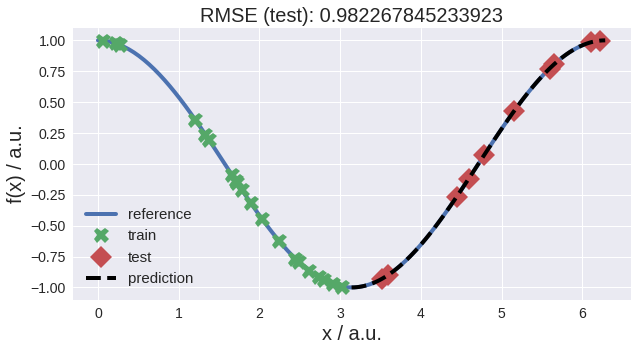

In [11]:
plt.figure(figsize=(10, 5))

plt.title(f"RMSE (test): {rmse_test}", fontsize=20)

plt.plot(x, y, label="reference", linewidth=4)

plt.plot(X_train.reshape(X_train.shape[0]), y_train, "X", label="train", markersize=15)
plt.plot(X_test.reshape(X_test.shape[0]), y_test, "D", label="test", markersize=15)

plt.plot(x_predicted, y_predicted, "k--", label="prediction", linewidth=4)


plt.xlabel("x / a.u.", fontsize=20)
plt.ylabel("f(x) / a.u.", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=15)


## Lets automatize this and try other functions

(20, 1) (20, 1)
(10, 1) (10, 1)
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/home/jcartus/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0    15.83          1.90313        7        0.0101444        0.0155935     26.55s
   1     8.61         0.813518        9       0.00378127       0.00354966     27.91s
Found Expression: sin(add(sin(add(0.915, 0.294)), add(X0, 0.630)))


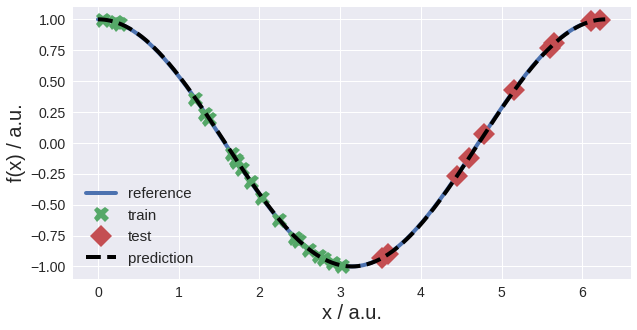

In [59]:
def test_regression(
    f,
    x0, 
    x1,
    x_m=None,
    n_train=20,
    n_test=10,
    n_input_dim=1,
    function_set=['add', 'sub', 'mul', 'div', 'cos']
):
    
    #--- train ---
    if not x_m:
        x_m = (x0 + x1) / 2

    rng = check_random_state(0)

    # Training samples
    X_train = rng.uniform(x0, x_m, n_train * n_input_dim).reshape(n_train, n_input_dim)
    y_train = f(X_train)
    print(X_train.shape, y_train.shape)
    
    # Testing samples
    X_test = rng.uniform(x_m, x1, n_test * n_input_dim).reshape(n_test, n_input_dim)
    y_test = f(X_test)
    print(X_test.shape, y_test.shape)
    #---
    
    #--- do regression ---
    from gplearn.genetic import SymbolicRegressor

    est_gp = SymbolicRegressor(
        population_size=5000,
        generations=20, 
        stopping_criteria=0.01,
        p_crossover=0.7, 
        p_subtree_mutation=0.1,
        p_hoist_mutation=0.05, 
        p_point_mutation=0.1,
        max_samples=0.9, 
        verbose=1,
        parsimony_coefficient=0.01, 
        random_state=0,
        function_set=function_set
    )

    est_gp.fit(X_train, y_train);
    #---
    
    #--- output results ---
    print("Found Expression: " + str(est_gp._program))
    
    plt.figure(figsize=(10, 5))

    #plt.title(f"RMSE (test): {rmse_test}", fontsize=20)
    
    x = np.linspace(x0, x1, 500)
    y = f(x)
    plt.plot(x, y, label="reference", linewidth=4)

    plt.plot(X_train.flatten(), y_train, "X", label="train", markersize=15)
    plt.plot(X_test.flatten(), y_test, "D", label="test", markersize=15)

    y_predicted = est_gp.predict(x.reshape(500,n_input_dim))
    plt.plot(x, y_predicted, "k--", label="prediction", linewidth=4)


    plt.xlabel("x / a.u.", fontsize=20)
    plt.ylabel("f(x) / a.u.", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.legend(fontsize=15)

test_regression(
    f=np.cos,
    x0=0, 
    x1=2*np.pi,
    n_train=20,
    n_test=10,
    function_set=['add', 'sin']
)

## ==> sin(add(sin(add(0.915, 0.294)), add(X0, 0.630))) = sin(x + pi/2) = cos(x)

(40, 1) (40, 1)
(10, 1) (10, 1)
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/home/jcartus/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0    31.51          162.592       46         0.282872         0.247918     41.03s
   1     8.66          1.78386       25         0.178135         0.275452     24.78s
   2     6.75          1.23076       25         0.180552         0.253704     22.06s
   3     9.19          1.15174        8        0.0408099        0.0161604     22.11s
   4    13.12          0.89187        8        0.0398995        0.0243544     24.28s
   5    14.37         0.804134       25        0.0316829        0.0384313     22.77s
   6    13.86         0.753651       25         0.029822        0.0551796     19.57s
   7    13.19         0.752421       12        0.0145375         0.019712     18.48s
   8    11.29          0.76788       12        0.0136849        0.0273857     15.70s
   9     9.77         0.755569       12        0.0139878        0.0246593     14.35s
  10     8.29          0.75772       12        0.0148376        0.0170115     13.08s
  11     8.00         0.753768        8         0.032473         

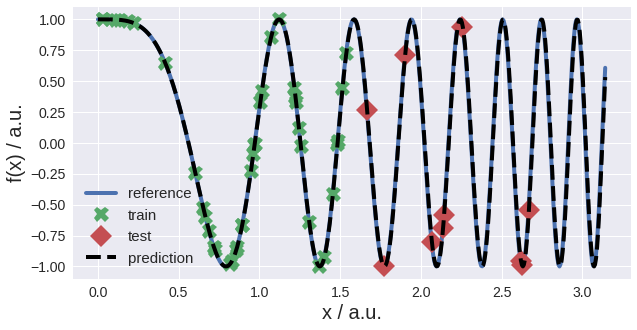

In [20]:
test_regression(
    f=lambda x: np.cos(5 * x**2),
    x0=0, 
    x1=np.pi,
    n_train=40,
    n_test=10,
    function_set=['add', 'sub', 'mul', 'div', 'cos']
)

(40, 1) (40, 1)
(10, 1) (10, 1)
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/home/jcartus/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0    23.28          1330.27       26          91.6535          41.2078     38.54s
   1    23.79          932.862       18          42.8005          59.9613     38.27s
   2    39.32          3488.58       18          43.4944          53.7157     47.14s
   3    58.19          9885.93       18           38.267          41.4997     54.71s
   4    50.00          19712.5       18          39.8703          27.0701     46.86s
   5    72.63            28555       78          36.3481          60.4848     56.04s
   6    68.49          39479.2      118          30.6971           64.554     47.88s
   7    37.82          76111.1      118          32.6091          48.1252     31.44s
   8    45.65          57388.2      150          27.8953          76.4483     32.73s
   9    74.30          27946.6      114          26.9602          117.486     40.97s
  10   113.11          5563.64      110          25.4125          39.8866     52.89s
  11   116.95          30060.7      151          24.6889         

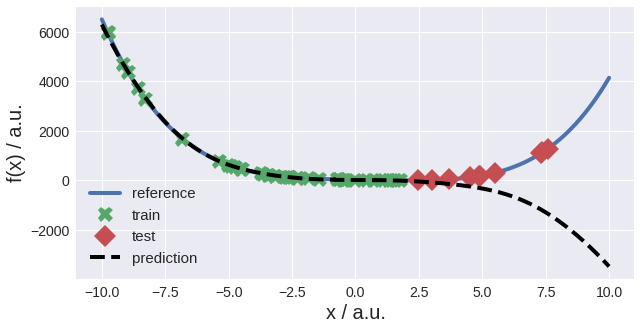

In [78]:
test_regression(
    f=lambda x:  3*(x-3)**2 - x**3 + 0.5*x**4,
    x0=-10, 
    x_m=2,
    x1=10,
    n_train=40,
    n_test=10,
    function_set=['add', 'sub', 'mul', 'div', 'cos', 'log']
)

(40, 1) (40, 1)
(10, 1) (10, 1)
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/home/jcartus/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0    23.28          602.777       15          78.7492          875.208     40.15s
   1    21.93          172.212       61          51.9437          91.6533     36.46s
   2    28.89          240.509       62          51.8428          64.4323     41.00s
   3    46.85          973.108       85          28.8441          759.067     54.30s
   4    55.56          953.374       59          44.0898          121.638     45.92s
   5    62.70          601.339      101          41.1238          40.3087     45.43s
   6    68.59          688.547       56          36.2995            143.4     43.52s
   7    74.47          641.611       46          30.6776          224.623     43.41s
   8    79.62          1019.78       58          32.2832          50.9934     43.56s
   9    84.16          1064.64       63          29.4568          51.2907     41.58s
  10    85.26          1807.59      106          24.4039          56.9778     39.68s
  11    80.21          2209.25       84          22.4503         

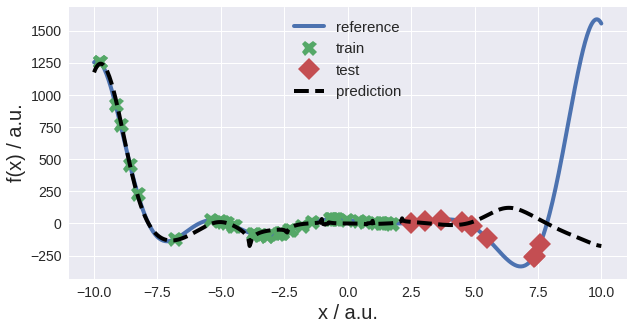

In [77]:
test_regression(
    f=lambda x:  np.cos(x) * (3*(x-3)**2 - 0.2*x**4),
    x0=-10, 
    x_m=2,
    x1=10,
    n_train=40,
    n_test=10,
    function_set=['add', 'sub', 'mul', 'div', 'cos', 'log']
)

# 2D: Henon-Heiles System
https://en.wikipedia.org/wiki/H%C3%A9non%E2%80%93Heiles_system

In [79]:
f = lambda x, y: (x**2 + y**2)/2 + (x**2 * y - y**3/3)

In [145]:
x0 = -3
x1 = 3
x = np.linspace(x0, x1, 100)
y = x

<IPython.core.display.Javascript object>


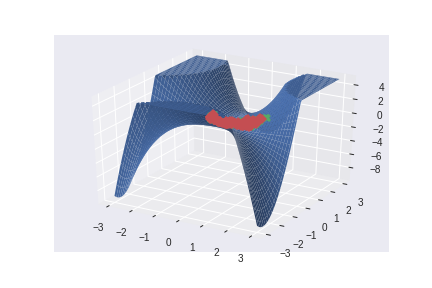

In [146]:
from mpl_toolkits.mplot3d import Axes3D
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)
zz[zz>5] = 5

ax = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, zz)

In [110]:
n_input_dim=2
n_train = 100
X_train = rng.uniform(x0, x1, n_train * n_input_dim).reshape(n_train, n_input_dim)
y_train = f(X_train[:, 0], X_train[:, 1])
print(X_train.shape, y_train.shape)

# Testing samples
n_test = 100
X_test = rng.uniform(x0, x1, n_test * n_input_dim).reshape(n_test, n_input_dim)
y_test = f(X_test[:, 0], X_test[:, 1])
print(X_test.shape, y_test.shape)

(100, 2) (100,)
(100, 2) (100,)


In [147]:
# check if some form is recognizable
plt.plot(X_train[0:, 1], y_train, "X")
plt.plot(X_test[0:, 1], y_test, "D")

In [148]:
from gplearn.genetic import SymbolicRegressor

est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20, 
    stopping_criteria=0.01,
    p_crossover=0.7, 
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05, 
    p_point_mutation=0.1,
    max_samples=0.9, 
    verbose=1,
    parsimony_coefficient=0.01, 
    random_state=1,
    function_set=['add', 'sub', 'mul', 'div'],
)

est_gp.fit(X_train, y_train);

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.31           4079.2       11         0.199262         0.300636     47.90s
   1     9.32          1.37587        5         0.162785         0.246983     25.38s
   2     5.05          17.6505        7         0.151101         0.314178     20.65s
   3     3.22         0.642564        5         0.147636         0.338133     18.28s
   4     3.01          1.06312        7         0.143829         0.299969     19.62s
   5     3.74          0.83792        5         0.140631         0.369224     16.44s
   6     4.69         0.649997        5         0.138916         0.416621     15.68s
   7     5.21         0.920557        5         0.136921         0.402616     14.73s
   8     5.28         0.526901        5          0.13145         0.451854  

In [149]:
print("Found Expression: " + str(est_gp._program))

Found Expression: mul(mul(X1, X1), 0.696)


In [150]:
%matplotlib notebook

<IPython.core.display.Javascript object>


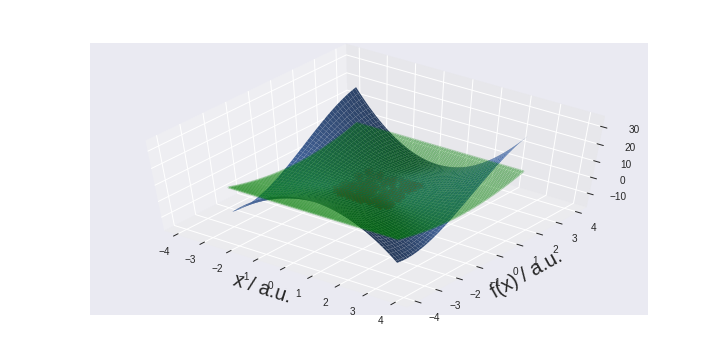

Text(0.5, 0, 'f(x) / a.u.')

In [151]:
from mpl_toolkits.mplot3d import Axes3D
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

ax = plt.figure(figsize=(10, 5)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, label="reference")

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, label="train", marker="X", color="r", s=30)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, label="test", marker="D", color="r", s=30)

z_predicted = est_gp.predict(np.vstack((xx.flatten(), yy.flatten())).T)
ax.scatter(xx, yy, z_predicted, label="prediction", alpha=0.2, s=5, color="g")


plt.xlabel("x / a.u.", fontsize=20)
plt.ylabel("f(x) / a.u.", fontsize=20)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.legend(fontsize=15)


In [139]:
np.vstack((xx.flatten(), yy.flatten())).T.shape

(10000, 2)